In [1]:
from datasist.structdata import detect_outliers
from sklearn.impute import KNNImputer
import plotly.graph_objects as go
import plotly.express as px
import streamlit as st
import pandas as pd

# read data

In [2]:
df1=pd.read_csv('AdventureWorks_Sales_2016.csv') #read dataset
df1

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1
1,1/1/2016,9/30/2002,SO48802,383,24923,9,1,1
2,1/1/2016,11/29/2002,SO48801,326,15493,1,1,1
3,1/1/2016,11/16/2002,SO48799,352,26708,4,1,1
4,1/1/2016,12/16/2002,SO48798,369,23332,9,1,1
...,...,...,...,...,...,...,...,...
23930,12/31/2016,12/11/2003,SO61111,591,17841,10,1,1
23931,12/31/2016,10/15/2003,SO61147,464,12146,4,4,2
23932,12/31/2016,11/4/2003,SO61147,528,12146,4,1,2
23933,12/31/2016,11/9/2003,SO61147,215,12146,4,3,1


In [3]:
df2=pd.read_csv('AdventureWorks_Products.csv')
df2

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice
0,344,1,BK-M82S-38,"Mountain-100 Silver, 38",Mountain-100,Top-of-the-line competition mountain bike. Per...,Silver,38,U,1912.1544,3399.99
1,345,1,BK-M82S-42,"Mountain-100 Silver, 42",Mountain-100,Top-of-the-line competition mountain bike. Per...,Silver,42,U,1912.1544,3399.99
2,346,1,BK-M82S-44,"Mountain-100 Silver, 44",Mountain-100,Top-of-the-line competition mountain bike. Per...,Silver,44,U,1912.1544,3399.99
3,347,1,BK-M82S-48,"Mountain-100 Silver, 48",Mountain-100,Top-of-the-line competition mountain bike. Per...,Silver,48,U,1912.1544,3399.99
4,348,1,BK-M82B-38,"Mountain-100 Black, 38",Mountain-100,Top-of-the-line competition mountain bike. Per...,Black,38,U,1898.0944,3374.99
...,...,...,...,...,...,...,...,...,...,...,...
288,537,37,TI-M823,HL Mountain Tire,HL Mountain Tire,"Incredible traction, lightweight carbon reinfo...",NaN,0,0,13.0900,35.00
289,538,37,TI-R092,LL Road Tire,LL Road Tire,Same great treads as more expensive tire with ...,NaN,0,0,8.0373,21.49
290,539,37,TI-R628,ML Road Tire,ML Road Tire,Higher density rubber.,NaN,0,0,9.3463,24.99
291,540,37,TI-R982,HL Road Tire,HL Road Tire,Lightweight carbon reinforced for an unrivale...,NaN,0,0,12.1924,32.60


In [4]:
df3=pd.read_csv('AdventureWorks_Returns.csv')
df3

,ReturnDate,TerritoryKey,ProductKey,ReturnQuantity
0,1/18/2015,9,312,1
1,1/18/2015,10,310,1
2,1/21/2015,8,346,1
3,1/22/2015,4,311,1
4,2/2/2015,6,312,1
...,...,...,...,...
1804,6/30/2017,6,491,1
1805,6/30/2017,8,477,1
1806,6/30/2017,9,477,1
1807,6/30/2017,10,223,1


In [5]:
df4=pd.read_csv('AdventureWorks_Territories.csv')
df4

,SalesTerritoryKey,Region,Country,Continent
0,1,Northwest,United States,North America
1,2,Northeast,United States,North America
2,3,Central,United States,North America
3,4,Southwest,United States,North America
4,5,Southeast,United States,North America
5,6,Canada,Canada,North America
6,7,France,France,Europe
7,8,Germany,Germany,Europe
8,9,Australia,Australia,Pacific
9,10,United Kingdom,United Kingdom,Europe


In [6]:
df5=pd.read_csv('AdventureWorks_Product_Categories.csv')
df5

,ProductCategoryKey,CategoryName
0,1,Bikes
1,2,Components
2,3,Clothing
3,4,Accessories


In [7]:
df6=pd.read_csv('AdventureWorks_Product_Subcategories.csv')
df6

,ProductSubcategoryKey,SubcategoryName,ProductCategoryKey
0,1,Mountain Bikes,1
1,2,Road Bikes,1
2,3,Touring Bikes,1
3,4,Handlebars,2
4,5,Bottom Brackets,2
5,6,Brakes,2
6,7,Chains,2
7,8,Cranksets,2
8,9,Derailleurs,2
9,10,Forks,2


# Merging Tables

In [8]:
first_merge=pd.merge(df1, df2, how='left', on='ProductKey')
first_merge

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice
0,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,"Road-550-W Yellow, 42",Road-550-W,Same technology as all of our Road series bike...,Yellow,42,W,605.6492,1000.4375
1,1/1/2016,9/30/2002,SO48802,383,24923,9,1,1,2,BK-R64Y-40,"Road-550-W Yellow, 40",Road-550-W,Same technology as all of our Road series bike...,Yellow,40,W,605.6492,1000.4375
2,1/1/2016,11/29/2002,SO48801,326,15493,1,1,1,2,BK-R50R-44,"Road-650 Red, 44",Road-650,Value-priced bike with many features of our to...,Red,44,U,413.1463,699.0982
3,1/1/2016,11/16/2002,SO48799,352,26708,4,1,1,1,BK-M68S-38,"Mountain-200 Silver, 38",Mountain-200,Serious back-country riding. Perfect for all l...,Silver,38,U,1117.8559,2071.4196
4,1/1/2016,12/16/2002,SO48798,369,23332,9,1,1,2,BK-R89R-48,"Road-250 Red, 48",Road-250,"Alluminum-alloy frame provides a light, stiff ...",Red,48,U,1518.7864,2443.3500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23930,12/31/2016,12/11/2003,SO61111,591,17841,10,1,1,1,BK-M18S-40,"Mountain-500 Silver, 40",Mountain-500,"Suitable for any type of riding, on or off-roa...",Silver,40,U,308.2179,564.9900
23931,12/31/2016,10/15/2003,SO61147,464,12146,4,4,2,20,GL-H102-M,"Half-Finger Gloves, M",Half-Finger Gloves,"Full padding, improved finger flex, durable pa...",Black,M,U,9.7136,23.5481
23932,12/31/2016,11/4/2003,SO61147,528,12146,4,1,2,37,TT-M928,Mountain Tire Tube,Mountain Tire Tube,Self-sealing tube.,NaN,0,0,1.8663,4.9900
23933,12/31/2016,11/9/2003,SO61147,215,12146,4,3,1,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.0278,33.6442


In [9]:
second_merge=pd.merge(first_merge, df3, how='left', on='ProductKey')
second_merge

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey_x,OrderLineItem,OrderQuantity,ProductSubcategoryKey,ProductSKU,...,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,ReturnDate,TerritoryKey_y,ReturnQuantity
0,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,Road-550-W,Same technology as all of our Road series bike...,Yellow,42,W,605.6492,1000.4375,8/11/2016,4.0,1.0
1,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,Road-550-W,Same technology as all of our Road series bike...,Yellow,42,W,605.6492,1000.4375,9/2/2016,9.0,1.0
2,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,Road-550-W,Same technology as all of our Road series bike...,Yellow,42,W,605.6492,1000.4375,9/10/2016,9.0,1.0
3,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,Road-550-W,Same technology as all of our Road series bike...,Yellow,42,W,605.6492,1000.4375,11/2/2016,10.0,1.0
4,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,Road-550-W,Same technology as all of our Road series bike...,Yellow,42,W,605.6492,1000.4375,11/17/2016,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135552,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,HL Mountain Tire,"Incredible traction, lightweight carbon reinfo...",NaN,0,0,13.0900,35.0000,6/7/2017,9.0,1.0
1135553,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,HL Mountain Tire,"Incredible traction, lightweight carbon reinfo...",NaN,0,0,13.0900,35.0000,6/8/2017,1.0,1.0
1135554,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,HL Mountain Tire,"Incredible traction, lightweight carbon reinfo...",NaN,0,0,13.0900,35.0000,6/12/2017,9.0,1.0
1135555,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,HL Mountain Tire,"Incredible traction, lightweight carbon reinfo...",NaN,0,0,13.0900,35.0000,6/14/2017,1.0,1.0


In [10]:
third_merge=pd.merge(second_merge, df4, how='left', left_on='TerritoryKey_x', right_on='SalesTerritoryKey')
third_merge

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey_x,OrderLineItem,OrderQuantity,ProductSubcategoryKey,ProductSKU,...,ProductStyle,ProductCost,ProductPrice,ReturnDate,TerritoryKey_y,ReturnQuantity,SalesTerritoryKey,Region,Country,Continent
0,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,W,605.6492,1000.4375,8/11/2016,4.0,1.0,1,Northwest,United States,North America
1,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,W,605.6492,1000.4375,9/2/2016,9.0,1.0,1,Northwest,United States,North America
2,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,W,605.6492,1000.4375,9/10/2016,9.0,1.0,1,Northwest,United States,North America
3,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,W,605.6492,1000.4375,11/2/2016,10.0,1.0,1,Northwest,United States,North America
4,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,W,605.6492,1000.4375,11/17/2016,10.0,1.0,1,Northwest,United States,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135552,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,0,13.0900,35.0000,6/7/2017,9.0,1.0,4,Southwest,United States,North America
1135553,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,0,13.0900,35.0000,6/8/2017,1.0,1.0,4,Southwest,United States,North America
1135554,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,0,13.0900,35.0000,6/12/2017,9.0,1.0,4,Southwest,United States,North America
1135555,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,0,13.0900,35.0000,6/14/2017,1.0,1.0,4,Southwest,United States,North America


In [11]:
fourth_merge=pd.merge(third_merge, df6, on='ProductSubcategoryKey', how='left')
fourth_merge

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey_x,OrderLineItem,OrderQuantity,ProductSubcategoryKey,ProductSKU,...,ProductPrice,ReturnDate,TerritoryKey_y,ReturnQuantity,SalesTerritoryKey,Region,Country,Continent,SubcategoryName,ProductCategoryKey
0,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,1000.4375,8/11/2016,4.0,1.0,1,Northwest,United States,North America,Road Bikes,1
1,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,1000.4375,9/2/2016,9.0,1.0,1,Northwest,United States,North America,Road Bikes,1
2,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,1000.4375,9/10/2016,9.0,1.0,1,Northwest,United States,North America,Road Bikes,1
3,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,1000.4375,11/2/2016,10.0,1.0,1,Northwest,United States,North America,Road Bikes,1
4,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,1000.4375,11/17/2016,10.0,1.0,1,Northwest,United States,North America,Road Bikes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135552,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,35.0000,6/7/2017,9.0,1.0,4,Southwest,United States,North America,Tires and Tubes,4
1135553,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,35.0000,6/8/2017,1.0,1.0,4,Southwest,United States,North America,Tires and Tubes,4
1135554,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,35.0000,6/12/2017,9.0,1.0,4,Southwest,United States,North America,Tires and Tubes,4
1135555,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,35.0000,6/14/2017,1.0,1.0,4,Southwest,United States,North America,Tires and Tubes,4


In [12]:
df = pd.merge(fourth_merge, df5, how='left', on='ProductCategoryKey')
df

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey_x,OrderLineItem,OrderQuantity,ProductSubcategoryKey,ProductSKU,...,ReturnDate,TerritoryKey_y,ReturnQuantity,SalesTerritoryKey,Region,Country,Continent,SubcategoryName,ProductCategoryKey,CategoryName
0,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,8/11/2016,4.0,1.0,1,Northwest,United States,North America,Road Bikes,1,Bikes
1,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,9/2/2016,9.0,1.0,1,Northwest,United States,North America,Road Bikes,1,Bikes
2,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,9/10/2016,9.0,1.0,1,Northwest,United States,North America,Road Bikes,1,Bikes
3,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,11/2/2016,10.0,1.0,1,Northwest,United States,North America,Road Bikes,1,Bikes
4,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,11/17/2016,10.0,1.0,1,Northwest,United States,North America,Road Bikes,1,Bikes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135552,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,6/7/2017,9.0,1.0,4,Southwest,United States,North America,Tires and Tubes,4,Accessories
1135553,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,6/8/2017,1.0,1.0,4,Southwest,United States,North America,Tires and Tubes,4,Accessories
1135554,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,6/12/2017,9.0,1.0,4,Southwest,United States,North America,Tires and Tubes,4,Accessories
1135555,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,6/14/2017,1.0,1.0,4,Southwest,United States,North America,Tires and Tubes,4,Accessories


# Data Understanding

In [13]:
df.info() #get information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135557 entries, 0 to 1135556
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   OrderDate              1135557 non-null  object 
 1   StockDate              1135557 non-null  object 
 2   OrderNumber            1135557 non-null  object 
 3   ProductKey             1135557 non-null  int64  
 4   CustomerKey            1135557 non-null  int64  
 5   TerritoryKey_x         1135557 non-null  int64  
 6   OrderLineItem          1135557 non-null  int64  
 7   OrderQuantity          1135557 non-null  int64  
 8   ProductSubcategoryKey  1135557 non-null  int64  
 9   ProductSKU             1135557 non-null  object 
 10  ProductName            1135557 non-null  object 
 11  ModelName              1135557 non-null  object 
 12  ProductDescription     1135557 non-null  object 
 13  ProductColor           295552 non-null   object 
 14  ProductSize       

In [14]:
df.head() # first 5 rows

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey_x,OrderLineItem,OrderQuantity,ProductSubcategoryKey,ProductSKU,...,ReturnDate,TerritoryKey_y,ReturnQuantity,SalesTerritoryKey,Region,Country,Continent,SubcategoryName,ProductCategoryKey,CategoryName
0,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,8/11/2016,4.0,1.0,1,Northwest,United States,North America,Road Bikes,1,Bikes
1,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,9/2/2016,9.0,1.0,1,Northwest,United States,North America,Road Bikes,1,Bikes
2,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,9/10/2016,9.0,1.0,1,Northwest,United States,North America,Road Bikes,1,Bikes
3,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,11/2/2016,10.0,1.0,1,Northwest,United States,North America,Road Bikes,1,Bikes
4,1/1/2016,10/17/2002,SO48797,385,14335,1,1,1,2,BK-R64Y-42,...,11/17/2016,10.0,1.0,1,Northwest,United States,North America,Road Bikes,1,Bikes


In [15]:
df.tail() # last 5 rows

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey_x,OrderLineItem,OrderQuantity,ProductSubcategoryKey,ProductSKU,...,ReturnDate,TerritoryKey_y,ReturnQuantity,SalesTerritoryKey,Region,Country,Continent,SubcategoryName,ProductCategoryKey,CategoryName
1135552,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,6/7/2017,9.0,1.0,4,Southwest,United States,North America,Tires and Tubes,4,Accessories
1135553,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,6/8/2017,1.0,1.0,4,Southwest,United States,North America,Tires and Tubes,4,Accessories
1135554,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,6/12/2017,9.0,1.0,4,Southwest,United States,North America,Tires and Tubes,4,Accessories
1135555,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,6/14/2017,1.0,1.0,4,Southwest,United States,North America,Tires and Tubes,4,Accessories
1135556,12/31/2016,11/16/2003,SO61147,537,12146,4,2,1,37,TI-M823,...,6/27/2017,4.0,1.0,4,Southwest,United States,North America,Tires and Tubes,4,Accessories


In [16]:
df.isnull().mean()*100 # check percentage of null values

OrderDate                 0.000000
StockDate                 0.000000
OrderNumber               0.000000
ProductKey                0.000000
CustomerKey               0.000000
TerritoryKey_x            0.000000
OrderLineItem             0.000000
OrderQuantity             0.000000
ProductSubcategoryKey     0.000000
ProductSKU                0.000000
ProductName               0.000000
ModelName                 0.000000
ProductDescription        0.000000
ProductColor             73.972949
ProductSize               0.000000
ProductStyle              0.000000
ProductCost               0.000000
ProductPrice              0.000000
ReturnDate                0.007485
TerritoryKey_y            0.007485
ReturnQuantity            0.007485
SalesTerritoryKey         0.000000
Region                    0.000000
Country                   0.000000
Continent                 0.000000
SubcategoryName           0.000000
ProductCategoryKey        0.000000
CategoryName              0.000000
dtype: float64

# Data Cleaning And Univariate Analysis


In [17]:
colors = px.colors.qualitative.Plotly
colors1 = px.colors.qualitative.Prism
colors2 = px.colors.qualitative.Pastel
colors3 = px.colors.qualitative.Dark2


In [18]:
df.duplicated().sum() # check sum of duplicated values

np.int64(0)

In [19]:
df.drop('ProductColor',axis=1,inplace=True)

In [20]:
df['OrderDate'].unique().tolist() #get unique values

['1/1/2016',
 '1/2/2016',
 '1/3/2016',
 '1/4/2016',
 '1/5/2016',
 '1/6/2016',
 '1/7/2016',
 '1/8/2016',
 '1/9/2016',
 '1/10/2016',
 '1/11/2016',
 '1/12/2016',
 '1/13/2016',
 '1/14/2016',
 '1/15/2016',
 '1/16/2016',
 '1/17/2016',
 '1/18/2016',
 '1/19/2016',
 '1/20/2016',
 '1/21/2016',
 '1/22/2016',
 '1/23/2016',
 '1/24/2016',
 '1/25/2016',
 '1/26/2016',
 '1/27/2016',
 '1/28/2016',
 '1/29/2016',
 '1/30/2016',
 '1/31/2016',
 '2/1/2016',
 '2/2/2016',
 '2/3/2016',
 '2/4/2016',
 '2/5/2016',
 '2/6/2016',
 '2/7/2016',
 '2/8/2016',
 '2/9/2016',
 '2/10/2016',
 '2/11/2016',
 '2/12/2016',
 '2/13/2016',
 '2/14/2016',
 '2/15/2016',
 '2/16/2016',
 '2/17/2016',
 '2/18/2016',
 '2/19/2016',
 '2/20/2016',
 '2/21/2016',
 '2/22/2016',
 '2/23/2016',
 '2/24/2016',
 '2/25/2016',
 '2/26/2016',
 '2/27/2016',
 '2/28/2016',
 '3/1/2016',
 '3/2/2016',
 '3/3/2016',
 '3/4/2016',
 '3/5/2016',
 '3/6/2016',
 '3/7/2016',
 '3/8/2016',
 '3/9/2016',
 '3/10/2016',
 '3/11/2016',
 '3/12/2016',
 '3/13/2016',
 '3/14/2016',
 '3/1

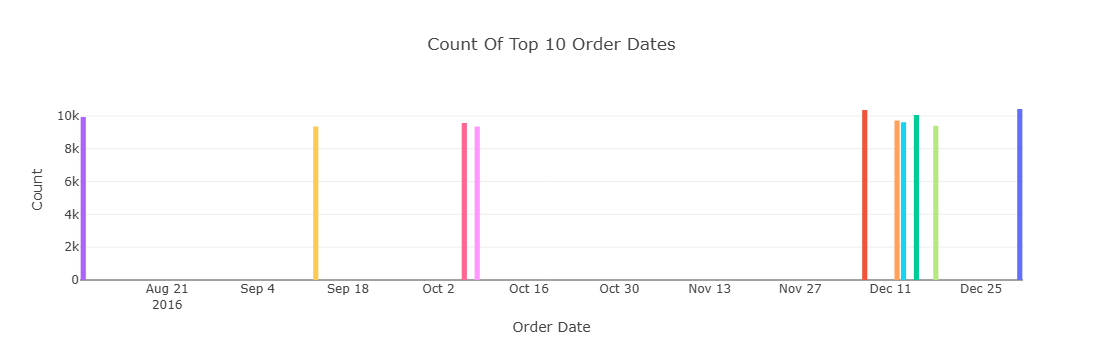

In [230]:
top_10_order_dates = df['OrderDate'].value_counts().sort_values(ascending=False).head(10)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_10_order_dates.index, 
    y=top_10_order_dates.values,  
    marker=dict(color=colors)    
))

fig.update_layout(
    title='Count Of Top 10 Order Dates',
    xaxis_title='Order Date',
    yaxis_title='Count',)

fig.show()

In [22]:
df['StockDate'].unique().tolist()

['10/17/2002',
 '9/30/2002',
 '11/29/2002',
 '11/16/2002',
 '12/16/2002',
 '12/2/2002',
 '10/19/2002',
 '11/23/2002',
 '12/1/2002',
 '9/12/2002',
 '10/30/2002',
 '9/15/2002',
 '10/27/2002',
 '10/10/2002',
 '12/11/2002',
 '10/18/2002',
 '10/22/2002',
 '11/30/2002',
 '10/6/2002',
 '9/6/2002',
 '10/29/2002',
 '12/4/2002',
 '9/10/2002',
 '10/11/2002',
 '11/15/2002',
 '10/25/2002',
 '10/2/2002',
 '12/6/2002',
 '12/13/2002',
 '11/2/2002',
 '12/15/2002',
 '11/1/2002',
 '9/11/2002',
 '11/3/2002',
 '11/5/2002',
 '10/24/2002',
 '9/17/2002',
 '11/19/2002',
 '9/9/2002',
 '11/18/2002',
 '10/26/2002',
 '11/12/2002',
 '12/14/2002',
 '10/16/2002',
 '11/24/2002',
 '11/8/2002',
 '10/3/2002',
 '12/9/2002',
 '9/24/2002',
 '9/21/2002',
 '9/29/2002',
 '9/28/2002',
 '12/22/2002',
 '10/23/2002',
 '11/20/2002',
 '10/8/2002',
 '12/5/2002',
 '12/19/2002',
 '10/7/2002',
 '11/4/2002',
 '11/13/2002',
 '12/26/2002',
 '10/21/2002',
 '11/7/2002',
 '12/21/2002',
 '12/12/2002',
 '10/13/2002',
 '10/15/2002',
 '10/14/2002

In [23]:
top_10_stock_dates=df['StockDate'].value_counts().sort_values(ascending=False).head(10)

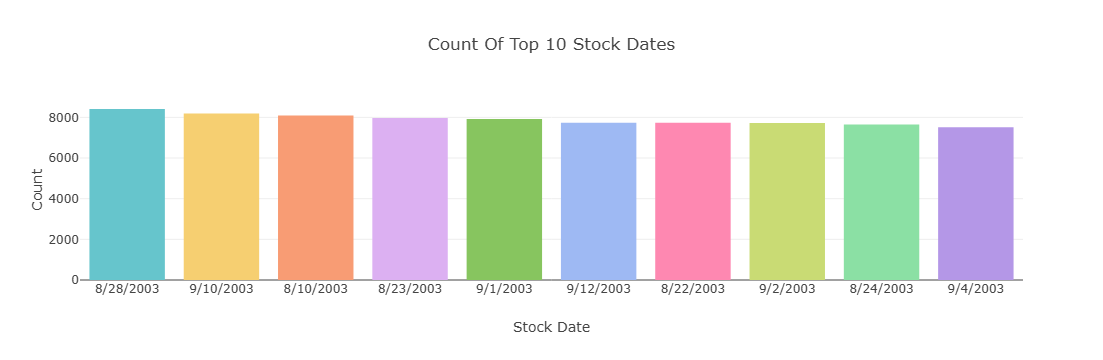

In [226]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_10_stock_dates.index,    
    y=top_10_stock_dates.values,   
    marker=dict(color=colors2),      
))

fig.update_layout(
    title='Count Of Top 10 Stock Dates',
    xaxis_title='Stock Date',
    yaxis_title='Count',)

fig.show()

In [25]:
df['OrderNumber'].unique().tolist()

['SO48797',
 'SO48802',
 'SO48801',
 'SO48799',
 'SO48798',
 'SO48800',
 'SO48795',
 'SO48796',
 'SO48804',
 'SO48814',
 'SO48812',
 'SO48803',
 'SO48809',
 'SO48807',
 'SO48805',
 'SO48808',
 'SO48813',
 'SO48810',
 'SO48806',
 'SO48811',
 'SO48819',
 'SO48817',
 'SO48820',
 'SO48815',
 'SO48818',
 'SO48821',
 'SO48816',
 'SO48827',
 'SO48825',
 'SO48829',
 'SO48822',
 'SO48824',
 'SO48828',
 'SO48823',
 'SO48826',
 'SO48835',
 'SO48832',
 'SO48831',
 'SO48836',
 'SO48834',
 'SO48833',
 'SO48830',
 'SO48838',
 'SO48837',
 'SO48841',
 'SO48845',
 'SO48843',
 'SO48839',
 'SO48847',
 'SO48844',
 'SO48846',
 'SO48840',
 'SO48842',
 'SO48855',
 'SO48857',
 'SO48852',
 'SO48851',
 'SO48853',
 'SO48856',
 'SO48849',
 'SO48854',
 'SO48850',
 'SO48848',
 'SO48862',
 'SO48858',
 'SO48864',
 'SO48860',
 'SO48863',
 'SO48865',
 'SO48859',
 'SO48861',
 'SO48866',
 'SO48871',
 'SO48869',
 'SO48868',
 'SO48870',
 'SO48876',
 'SO48872',
 'SO48867',
 'SO48877',
 'SO48875',
 'SO48874',
 'SO48883',
 'SO

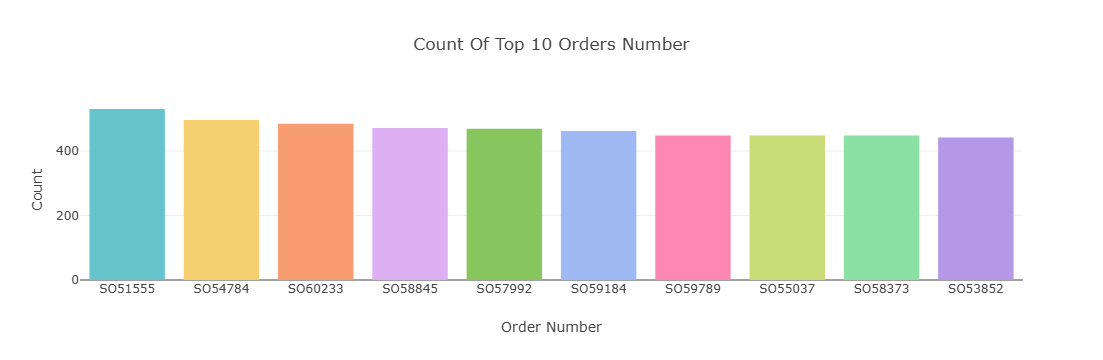

In [225]:
top10_order_numbers=df['OrderNumber'].value_counts().sort_values(ascending=False).head(10)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=top10_order_numbers.index,    
    y=top10_order_numbers.values,   
    marker=dict(color=colors2),      
))

fig.update_layout(
    title='Count Of Top 10 Orders Number',
    xaxis_title='Order Number',
    yaxis_title='Count',)

fig.show()

In [28]:
df['ProductKey'].unique().tolist()

[385,
 383,
 326,
 352,
 369,
 342,
 375,
 356,
 360,
 324,
 330,
 368,
 362,
 340,
 334,
 373,
 358,
 377,
 332,
 379,
 371,
 381,
 338,
 354,
 336,
 328,
 389,
 387,
 370,
 320,
 322,
 479,
 606,
 529,
 486,
 540,
 541,
 530,
 571,
 215,
 577,
 214,
 229,
 477,
 538,
 573,
 232,
 581,
 478,
 528,
 220,
 537,
 485,
 604,
 489,
 578,
 539,
 580,
 223,
 536,
 588,
 466,
 480,
 482,
 565,
 605,
 596,
 462,
 560,
 464,
 593,
 576,
 488,
 584,
 490,
 487,
 562,
 583,
 471,
 574,
 575,
 484,
 535,
 592,
 473,
 226,
 564,
 491,
 582,
 472,
 569,
 591,
 599,
 561,
 598,
 587,
 481,
 579,
 589,
 235,
 590,
 597,
 586,
 483,
 566,
 475,
 476,
 585,
 600,
 595,
 594,
 474,
 572,
 563,
 568,
 567,
 570]

In [29]:
df['ProductKey'].value_counts().sort_values(ascending=False).head(10)

ProductKey
477    252704
480    121808
528    117026
529     65258
214     61670
478     59570
220     55638
485     46710
215     45032
223     39150
Name: count, dtype: int64

In [30]:
df['CustomerKey'].unique().tolist()

[14335,
 24923,
 15493,
 26708,
 23332,
 15491,
 16538,
 15094,
 12276,
 13647,
 13630,
 19416,
 23411,
 20892,
 19318,
 16552,
 13631,
 23415,
 20885,
 15517,
 13622,
 26049,
 13958,
 17700,
 15497,
 23344,
 12459,
 26729,
 23414,
 23121,
 17743,
 23408,
 23120,
 16821,
 23421,
 21148,
 23418,
 20886,
 13959,
 26695,
 23118,
 17750,
 23409,
 23311,
 17716,
 13620,
 15489,
 16567,
 14336,
 15492,
 13651,
 17753,
 12463,
 13955,
 26652,
 15503,
 26717,
 15520,
 13967,
 28904,
 13643,
 29361,
 19424,
 26805,
 15455,
 13964,
 13849,
 26718,
 24924,
 16603,
 26786,
 13527,
 20736,
 23314,
 19320,
 23316,
 26588,
 15483,
 15451,
 26657,
 24922,
 13970,
 13528,
 24921,
 23324,
 13746,
 12526,
 17715,
 26801,
 15482,
 13618,
 13650,
 26711,
 26811,
 12473,
 17755,
 23313,
 13966,
 13856,
 17632,
 26653,
 13960,
 17772,
 26734,
 19418,
 19034,
 17714,
 16540,
 26814,
 12492,
 26705,
 13626,
 26727,
 13953,
 13616,
 23412,
 26658,
 13638,
 26735,
 20880,
 15481,
 13636,
 20841,
 16587,
 12275,


In [31]:
df['TerritoryKey_x'].unique().tolist()

[1, 9, 4, 5, 8, 7, 10, 6, 2, 3]

In [32]:
df['TerritoryKey_x'].value_counts().sort_values(ascending=False)

TerritoryKey_x
4     235738
9     222414
1     175847
6     163964
10    132005
8     102758
7     101099
2        649
3        562
5        521
Name: count, dtype: int64

In [34]:
df['OrderLineItem'].unique().tolist()

[1, 2, 3, 4, 5, 6, 7, 8]

In [35]:
df['OrderQuantity'].unique().tolist()

[1, 2, 3]

In [36]:
df['OrderQuantity'].value_counts().sort_values(ascending=False)

OrderQuantity
2    639233
1    389755
3    106569
Name: count, dtype: int64

In [38]:
df['ProductSubcategoryKey'].unique().tolist() # get unique values

[2, 1, 28, 37, 27, 3, 31, 21, 30, 19, 20, 23, 32, 25, 29, 26, 22]

In [39]:
df['ProductSKU'].unique().tolist() # get unique values

['BK-R64Y-42',
 'BK-R64Y-40',
 'BK-R50R-44',
 'BK-M68S-38',
 'BK-R89R-48',
 'BK-R50B-52',
 'BK-R89B-48',
 'BK-M68S-46',
 'BK-M68B-42',
 'BK-R50R-62',
 'BK-R50R-52',
 'BK-R89R-44',
 'BK-M68B-46',
 'BK-R50B-48',
 'BK-R50B-60',
 'BK-R89B-44',
 'BK-M68B-38',
 'BK-R89B-52',
 'BK-R50B-58',
 'BK-R89B-58',
 'BK-R89R-58',
 'BK-R64Y-38',
 'BK-R50B-44',
 'BK-M68S-42',
 'BK-R50B-62',
 'BK-R50R-48',
 'BK-R64Y-48',
 'BK-R64Y-44',
 'BK-R89R-52',
 'BK-R50R-58',
 'BK-R50R-60',
 'BC-R205',
 'BK-R19B-52',
 'TT-R982',
 'ST-1401',
 'TI-R982',
 'TI-T723',
 'TT-T092',
 'BK-T18Y-58',
 'HL-U509',
 'BK-T44U-46',
 'HL-U509-R',
 'LJ-0192-M',
 'WB-H098',
 'TI-R092',
 'BK-T79U-46',
 'LJ-0192-L',
 'BK-R79Y-42',
 'BC-M005',
 'TT-M928',
 'HL-U509-B',
 'TI-M823',
 'FE-6654',
 'BK-R19B-44',
 'SJ-0194-M',
 'BK-T44U-50',
 'TI-R628',
 'BK-R79Y-40',
 'CA-1098',
 'TI-M602',
 'BK-M38S-40',
 'GL-H102-L',
 'PK-7098',
 'SO-R809-L',
 'BK-T18U-54',
 'BK-R19B-48',
 'BK-M18B-40',
 'GL-H102-S',
 'BK-T44U-60',
 'GL-H102-M',
 'BK-M18S-

In [40]:
df['ProductName'].unique().tolist() # get unique values

['Road-550-W Yellow, 42',
 'Road-550-W Yellow, 40',
 'Road-650 Red, 44',
 'Mountain-200 Silver, 38',
 'Road-250 Red, 48',
 'Road-650 Black, 52',
 'Road-250 Black, 48',
 'Mountain-200 Silver, 46',
 'Mountain-200 Black, 42',
 'Road-650 Red, 62',
 'Road-650 Red, 52',
 'Road-250 Red, 44',
 'Mountain-200 Black, 46',
 'Road-650 Black, 48',
 'Road-650 Black, 60',
 'Road-250 Black, 44',
 'Mountain-200 Black, 38',
 'Road-250 Black, 52',
 'Road-650 Black, 58',
 'Road-250 Black, 58',
 'Road-250 Red, 58',
 'Road-550-W Yellow, 38',
 'Road-650 Black, 44',
 'Mountain-200 Silver, 42',
 'Road-650 Black, 62',
 'Road-650 Red, 48',
 'Road-550-W Yellow, 48',
 'Road-550-W Yellow, 44',
 'Road-250 Red, 52',
 'Road-650 Red, 58',
 'Road-650 Red, 60',
 'Road Bottle Cage',
 'Road-750 Black, 52',
 'Road Tire Tube',
 'All-Purpose Bike Stand',
 'HL Road Tire',
 'Touring Tire',
 'Touring Tire Tube',
 'Touring-3000 Yellow, 58',
 'Sport-100 Helmet, Black',
 'Touring-2000 Blue, 46',
 'Sport-100 Helmet, Red',
 'Long-Slee

In [41]:
df['ProductName'].value_counts().sort_values(ascending=False).head(10) # get count of top 10 values

ProductName
Water Bottle - 30 oz.      252704
Patch Kit/8 Patches        121808
Mountain Tire Tube         117026
Road Tire Tube              65258
Sport-100 Helmet, Red       61670
Mountain Bottle Cage        59570
Sport-100 Helmet, Blue      55638
Fender Set - Mountain       46710
Sport-100 Helmet, Black     45032
AWC Logo Cap                39150
Name: count, dtype: int64

In [42]:
df['ModelName'].unique().tolist() # get unique values

['Road-550-W',
 'Road-650',
 'Mountain-200',
 'Road-250',
 'Road Bottle Cage',
 'Road-750',
 'Road Tire Tube',
 'All-Purpose Bike Stand',
 'HL Road Tire',
 'Touring Tire',
 'Touring Tire Tube',
 'Touring-3000',
 'Sport-100',
 'Touring-2000',
 'Long-Sleeve Logo Jersey',
 'Water Bottle',
 'LL Road Tire',
 'Touring-1000',
 'Road-350-W',
 'Mountain Bottle Cage',
 'Mountain Tire Tube',
 'HL Mountain Tire',
 'Fender Set - Mountain',
 'Short-Sleeve Classic Jersey',
 'ML Road Tire',
 'Cycling Cap',
 'ML Mountain Tire',
 'Mountain-400-W',
 'Half-Finger Gloves',
 'Patch kit',
 'Racing Socks',
 'Mountain-500',
 'Hydration Pack',
 'Classic Vest',
 'Bike Wash',
 'LL Mountain Tire',
 'Hitch Rack - 4-Bike',
 "Women's Mountain Shorts"]

In [43]:
df['ProductDescription'].unique().tolist() # get unique values

['Same technology as all of our Road series bikes, but the frame is sized for a woman.  Perfect all-around bike for road or racing.',
 "Value-priced bike with many features of our top-of-the-line models. Has the same light, stiff frame, and the quick acceleration we're famous for.",
 'Serious back-country riding. Perfect for all levels of competition. Uses the same HL Frame as the Mountain-100.',
 'Alluminum-alloy frame provides a light, stiff ride, whether you are racing in the velodrome or on a demanding club ride on country roads.',
 'Aluminum cage is lighter than our mountain version; perfect for long distance trips.',
 'Entry level adult bike; offers a comfortable ride cross-country or down the block. Quick-release hubs and rims.',
 'Conventional all-purpose tube.',
 'Perfect all-purpose bike stand for working on your bike at home. Quick-adjusting clamps and steel construction.',
 'Lightweight carbon reinforced  for an unrivaled ride at an un-compromised weight.',
 'High-density r

In [44]:
df['ProductSize'].unique().tolist() # get unique values

['42',
 '40',
 '44',
 '38',
 '48',
 '52',
 '46',
 '62',
 '60',
 '58',
 '0',
 'M',
 'L',
 '50',
 '54',
 'S',
 '70',
 'XL']

In [45]:
df['ProductSize'].value_counts().sort_values(ascending=False).head(10) # get count of values

ProductSize
0     1041495
42      12072
M       11762
L       11085
46       9846
38       9457
S        8986
70       7525
48       5011
44       4675
Name: count, dtype: int64

In [47]:
df[df['ProductSize']=='XL']['CategoryName'].unique()

array(['Clothing'], dtype=object)

In [48]:
df[df['ProductSize']=='0']['ProductName'].unique()

array(['Road Bottle Cage', 'Road Tire Tube', 'All-Purpose Bike Stand',
       'HL Road Tire', 'Touring Tire', 'Touring Tire Tube',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Water Bottle - 30 oz.', 'LL Road Tire', 'Mountain Bottle Cage',
       'Mountain Tire Tube', 'Sport-100 Helmet, Blue', 'HL Mountain Tire',
       'Fender Set - Mountain', 'ML Road Tire', 'AWC Logo Cap',
       'ML Mountain Tire', 'Patch Kit/8 Patches', 'Bike Wash - Dissolver',
       'LL Mountain Tire', 'Hitch Rack - 4-Bike'], dtype=object)

In [49]:
df[df['ProductSize']=='S']['CategoryName'].unique()

array(['Clothing'], dtype=object)

In [50]:
df[df['ProductSize']=='L']['CategoryName'].unique()

array(['Clothing'], dtype=object)

In [51]:
df['ProductStyle'].unique().tolist() # get unique values

['W', 'U', '0']

In [52]:
df[df['ProductStyle']=='W']['ProductName'].unique()

array(['Road-550-W Yellow, 42', 'Road-550-W Yellow, 40',
       'Road-550-W Yellow, 38', 'Road-550-W Yellow, 48',
       'Road-550-W Yellow, 44', 'Road-350-W Yellow, 42',
       'Road-350-W Yellow, 40', 'Mountain-400-W Silver, 40',
       'Road-350-W Yellow, 48', 'Road-350-W Yellow, 44',
       'Mountain-400-W Silver, 38', 'Mountain-400-W Silver, 42',
       'Mountain-400-W Silver, 46', "Women's Mountain Shorts, M",
       "Women's Mountain Shorts, L", "Women's Mountain Shorts, S"],
      dtype=object)

In [53]:
df[df['ProductStyle']=='U']['ProductName'].unique()

array(['Road-650 Red, 44', 'Mountain-200 Silver, 38', 'Road-250 Red, 48',
       'Road-650 Black, 52', 'Road-250 Black, 48',
       'Mountain-200 Silver, 46', 'Mountain-200 Black, 42',
       'Road-650 Red, 62', 'Road-650 Red, 52', 'Road-250 Red, 44',
       'Mountain-200 Black, 46', 'Road-650 Black, 48',
       'Road-650 Black, 60', 'Road-250 Black, 44',
       'Mountain-200 Black, 38', 'Road-250 Black, 52',
       'Road-650 Black, 58', 'Road-250 Black, 58', 'Road-250 Red, 58',
       'Road-650 Black, 44', 'Mountain-200 Silver, 42',
       'Road-650 Black, 62', 'Road-650 Red, 48', 'Road-250 Red, 52',
       'Road-650 Red, 58', 'Road-650 Red, 60', 'Road-750 Black, 52',
       'Touring-3000 Yellow, 58', 'Touring-2000 Blue, 46',
       'Long-Sleeve Logo Jersey, M', 'Touring-1000 Blue, 46',
       'Long-Sleeve Logo Jersey, L', 'Road-750 Black, 44',
       'Short-Sleeve Classic Jersey, M', 'Touring-2000 Blue, 50',
       'AWC Logo Cap', 'Half-Finger Gloves, L', 'Racing Socks, L',
       'T

In [54]:
df['ProductCost'].unique().tolist() # get unique values

[605.6492,
 413.1463,
 1117.8559,
 1518.7864,
 1320.6838,
 1105.81,
 3.3623,
 343.6496,
 1.4923,
 59.466,
 12.1924,
 10.8423,
 1.8663,
 461.4448,
 12.0278,
 755.1508,
 13.0863,
 31.7244,
 8.0373,
 1481.9379,
 1082.51,
 3.7363,
 13.09,
 8.2205,
 41.5723,
 9.3463,
 5.7052,
 11.2163,
 419.7784,
 9.7136,
 0.8565,
 294.5797,
 308.2179,
 20.5663,
 23.749,
 2.9733,
 44.88,
 26.1763]

In [55]:
df[df['ProductCost']==0.8565]['ProductPrice'].unique()

array([2.29])

In [56]:
df['ProductPrice'].unique().tolist() # get unique values

[1000.4375,
 699.0982,
 2071.4196,
 2443.35,
 2181.5625,
 2049.0982,
 8.99,
 539.99,
 3.99,
 159.0,
 32.6,
 28.99,
 4.99,
 742.35,
 33.6442,
 1214.85,
 34.99,
 48.0673,
 21.49,
 2384.07,
 1700.99,
 9.99,
 35.0,
 21.98,
 53.99,
 24.99,
 8.6442,
 29.99,
 769.49,
 23.5481,
 2.29,
 564.99,
 54.99,
 63.5,
 7.95,
 120.0,
 69.99]

In [57]:
df['ReturnDate'].unique().tolist() # get unique values

['8/11/2016',
 '9/2/2016',
 '9/10/2016',
 '11/2/2016',
 '11/17/2016',
 '12/5/2016',
 '12/16/2016',
 '12/22/2016',
 '1/6/2017',
 '2/17/2017',
 '5/10/2017',
 '10/13/2016',
 '4/1/2017',
 '4/10/2017',
 '4/18/2017',
 '4/21/2017',
 '4/10/2015',
 '11/23/2015',
 '5/27/2016',
 '10/3/2015',
 '10/7/2015',
 '10/13/2015',
 '12/18/2015',
 '3/8/2016',
 '5/1/2016',
 '5/11/2016',
 '7/13/2016',
 '10/3/2016',
 '10/15/2016',
 '3/9/2017',
 '3/13/2017',
 '4/24/2017',
 '6/7/2017',
 '6/17/2017',
 '9/3/2015',
 '2/22/2016',
 '5/31/2016',
 '6/25/2016',
 '6/7/2015',
 '12/11/2015',
 '3/29/2016',
 '7/2/2016',
 '8/7/2016',
 '11/3/2016',
 '11/13/2016',
 '3/3/2017',
 '4/11/2017',
 '12/1/2015',
 '6/10/2016',
 '7/4/2016',
 '8/16/2016',
 '11/22/2016',
 '12/19/2016',
 '2/11/2017',
 '3/18/2017',
 '4/6/2017',
 '6/8/2017',
 '6/19/2017',
 '6/29/2017',
 '11/20/2015',
 '12/6/2015',
 '1/31/2016',
 '3/20/2016',
 '5/26/2016',
 '8/18/2016',
 '9/8/2016',
 '10/6/2016',
 '10/12/2016',
 '10/23/2016',
 '12/21/2016',
 '1/15/2017',
 '3/12

In [58]:
top_10_return_date=df['ReturnDate'].value_counts().sort_values(ascending=False).head(10)
top_10_return_date

ReturnDate
2/12/2017    9433
1/17/2017    8617
8/24/2016    8344
5/6/2017     8330
5/30/2017    7750
2/1/2017     7750
6/25/2017    7668
10/9/2016    7644
11/7/2016    7618
3/1/2017     7593
Name: count, dtype: int64

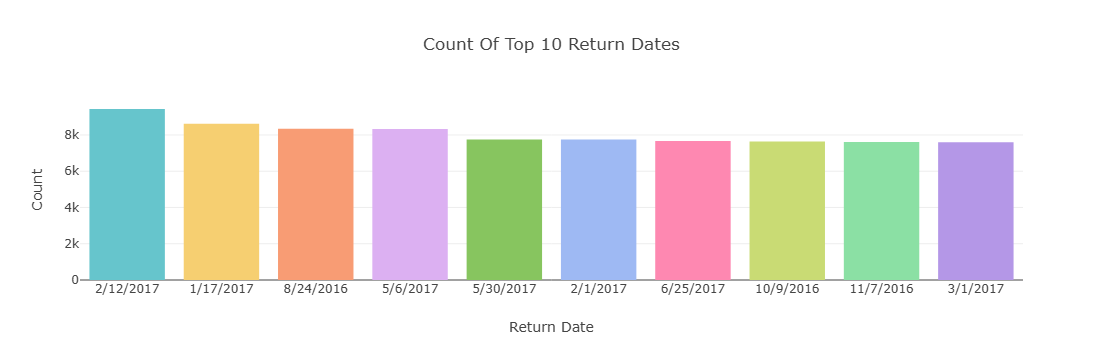

In [224]:
fig=go.Figure()
fig.add_trace(go.Bar(x=top_10_return_date.index,
                   y=top_10_return_date.values,
                   marker=dict(color=colors2)
                   ))

fig.update_layout(
    title='Count Of Top 10 Return Dates',
    xaxis_title='Return Date',
    yaxis_title='Count',)

fig.show()

In [60]:
df['TerritoryKey_y'].unique().tolist() # get unique values

[4.0, 9.0, 10.0, 8.0, 1.0, 7.0, 6.0, nan, 5.0]

In [61]:
df['TerritoryKey_y']=pd.to_numeric(df['TerritoryKey_y']) # change data type from object to integer

In [62]:
df.dropna(axis=0, inplace=True) # drop null values

In [63]:
df['TerritoryKey_y'].unique().tolist() # get unique values

[4.0, 9.0, 10.0, 8.0, 1.0, 7.0, 6.0, 5.0]

In [64]:
df['ReturnQuantity'].unique().tolist() # get unique values

[1.0, 2.0]

In [65]:
df['SalesTerritoryKey'].unique().tolist() # get unique values

[1, 9, 4, 5, 8, 7, 10, 6, 2, 3]

In [66]:
df[df['SalesTerritoryKey']==1]['Continent'].unique()

array(['North America'], dtype=object)

In [67]:
df['Region'].unique().tolist() # get unique values

['Northwest',
 'Australia',
 'Southwest',
 'Southeast',
 'Germany',
 'France',
 'United Kingdom',
 'Canada',
 'Northeast',
 'Central']

In [68]:
df['Country'].unique().tolist() # get unique values

['United States', 'Australia', 'Germany', 'France', 'United Kingdom', 'Canada']

In [69]:
df['Continent'].unique().tolist() # get unique values

['North America', 'Pacific', 'Europe']

In [70]:
df['SubcategoryName'].unique().tolist() # get unique values

['Road Bikes',
 'Mountain Bikes',
 'Bottles and Cages',
 'Tires and Tubes',
 'Bike Stands',
 'Touring Bikes',
 'Helmets',
 'Jerseys',
 'Fenders',
 'Caps',
 'Gloves',
 'Socks',
 'Hydration Packs',
 'Vests',
 'Cleaners',
 'Bike Racks',
 'Shorts']

In [71]:
top_10_subcat_name=df['SubcategoryName'].value_counts().sort_values(ascending=False).head(10)
top_10_subcat_name

SubcategoryName
Tires and Tubes      431702
Bottles and Cages    350169
Helmets              162340
Fenders               46710
Caps                  39150
Mountain Bikes        27865
Road Bikes            21137
Jerseys               15615
Cleaners               9400
Gloves                 9114
Name: count, dtype: int64

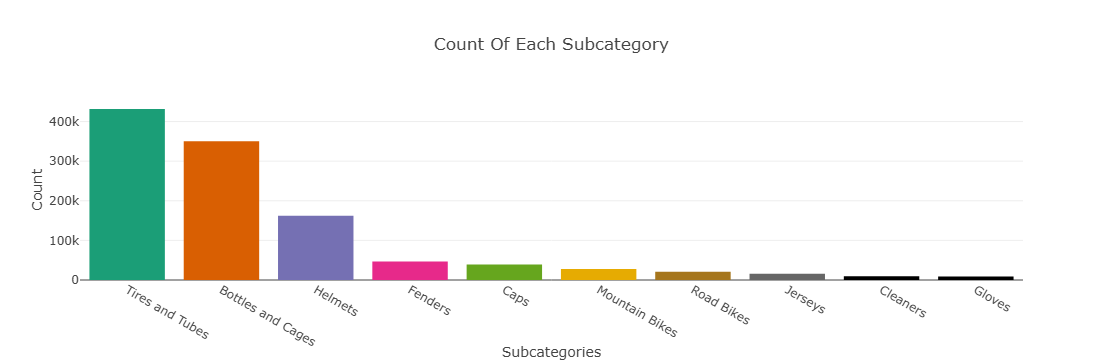

In [223]:
fig=go.Figure()
fig.add_trace(go.Bar(x=top_10_subcat_name.index,
                   y=top_10_subcat_name.values,
                   marker=dict(color=colors3)
                   ))

fig.update_layout(
    title='Count Of Each Subcategory ',
    xaxis_title='Subcategories',
    yaxis_title='Count',)

fig.show()

In [73]:
df['ProductCategoryKey'].unique().tolist()

[1, 4, 3]

In [74]:
df['CategoryName'].unique().tolist() # get unique values

['Bikes', 'Accessories', 'Clothing']

In [75]:
top_cat_name=df['CategoryName'].value_counts().sort_values(ascending=False)
top_cat_name

CategoryName
Accessories    1009870
Clothing         73493
Bikes            52109
Name: count, dtype: int64

In [76]:
fig=go.Figure()
fig.add_trace(go.Bar(x=top_cat_name.index,
                   y=top_cat_name.values,
                   marker=dict(color=colors3)
                   ))

fig.update_layout(
    title='Count Of Each Category ',
    xaxis_title='Categories',
    yaxis_title='Count',)

fig.show()

In [77]:
# change data type from object to datetime
df['OrderDate']=pd.to_datetime(df['OrderDate']) 
df['StockDate']=pd.to_datetime(df['StockDate']) 
df['ReturnDate']=pd.to_datetime(df['ReturnDate']) 


In [78]:
df['ReturnQuantity']=df['ReturnQuantity'].astype(int) # change from float to int

In [79]:
df.info() #get information about data

<class 'pandas.core.frame.DataFrame'>
Index: 1135472 entries, 0 to 1135556
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   OrderDate              1135472 non-null  datetime64[ns]
 1   StockDate              1135472 non-null  datetime64[ns]
 2   OrderNumber            1135472 non-null  object        
 3   ProductKey             1135472 non-null  int64         
 4   CustomerKey            1135472 non-null  int64         
 5   TerritoryKey_x         1135472 non-null  int64         
 6   OrderLineItem          1135472 non-null  int64         
 7   OrderQuantity          1135472 non-null  int64         
 8   ProductSubcategoryKey  1135472 non-null  int64         
 9   ProductSKU             1135472 non-null  object        
 10  ProductName            1135472 non-null  object        
 11  ModelName              1135472 non-null  object        
 12  ProductDescription     1135472 no

# Feature Engineering

In [80]:
df["Year"]= df['OrderDate'].dt.year
df["Month"]= df['OrderDate'].dt.month
df["Month Name"]= df['OrderDate'].dt.month_name()
df["Week"]=df['OrderDate'].dt.isocalendar().week
df['Day']= df['OrderDate'].dt.day_name()

In [81]:
df["Return_Year"]= df['ReturnDate'].dt.year
df["Return_Month"]= df['ReturnDate'].dt.month
df["Return_Month Name"]= df['ReturnDate'].dt.month_name()
df["Return_Week"]=df['ReturnDate'].dt.isocalendar().week
df['Return_Day']= df['ReturnDate'].dt.day_name()

In [82]:
#create function to get orders in each season
def month(x):
    if x in [12,1,2]:
        return 'Winter'
        
    elif x in [3,4,5]:
        return 'Spring'

    elif x in [6,7,8]:
        return 'Summer'

    else:
        return 'Autumn'

df['Order Season']=df["Month"].apply(month)

In [83]:
#create function to get returns in each season
def return_month(x):
    if x in [12,1,2]:
        return 'Winter'
        
    elif x in [3,4,5]:
        return 'Spring'

    elif x in [6,7,8]:
        return 'Summer'

    else:
        return 'Autumn'

df['Return Season']=df["Return_Month"].apply(month)

In [84]:
df['Profit']=df['ProductPrice'] - df['ProductCost']

In [85]:
# drop unnecessary columns
df.drop(['TerritoryKey_y','TerritoryKey_x','ProductCategoryKey','SalesTerritoryKey','ProductSubcategoryKey'], axis=1, inplace=True)

# Bivariate Analysis

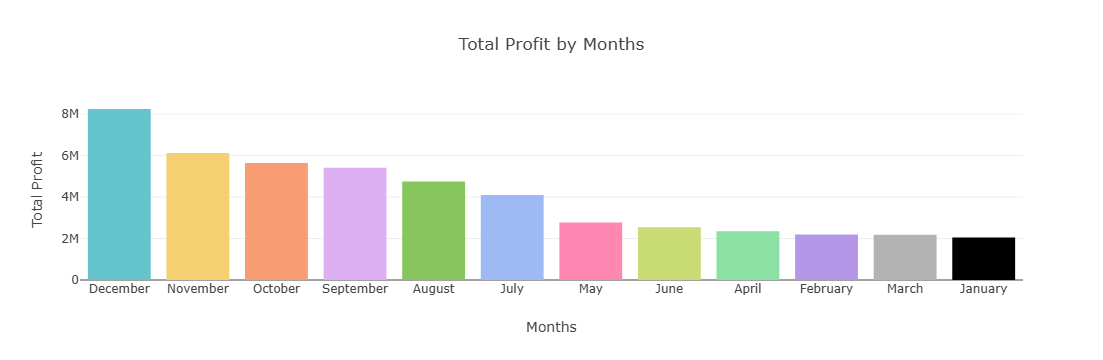

In [222]:
top_months=df.groupby('Month Name')[['Profit']].sum().sort_values(ascending=False, by='Profit')

fig=go.Figure()
fig.add_trace(go.Bar(x=top_months.index,
                   y=top_months['Profit'],
                   marker=dict(color=colors2)
                   ))

fig.update_layout(
    title='Total Profit by Months',
    xaxis_title='Months',
    yaxis_title='Total Profit',)

fig.show()

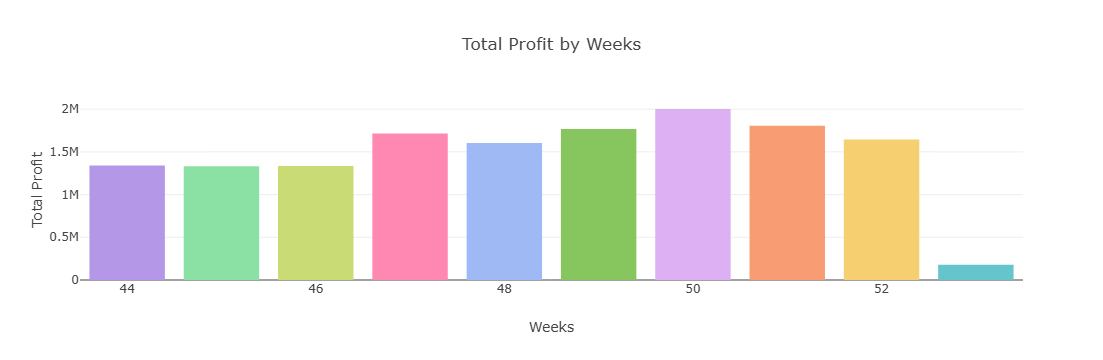

In [218]:
top_Week=df.groupby('Week')[['Profit']].sum().sort_values(ascending=False, by='Week').head(10)

fig=go.Figure()
fig.add_trace(go.Bar(x=top_Week.index,
                   y=top_Week['Profit'],
                   marker=dict(color=colors2)
                   ))

fig.update_layout(
    title='Total Profit by Weeks',
    xaxis_title='Weeks',
    yaxis_title='Total Profit',)

fig.show()

In [91]:
top_Day=df.groupby('Day')[['Profit']].sum().sort_values(ascending=False, by='Profit').head(10)

fig=go.Figure()
fig.add_trace(go.Bar(x=top_Day.index,
                   y=top_Day['Profit'],
                   marker=dict(color=colors3)
                   ))

fig.update_layout(
    title='Total Profit by Days',
    xaxis_title='Days',
    yaxis_title='Total Profit',)

fig.show()

In [93]:
top_season=df.groupby('Order Season')[['Profit']].sum().sort_values(ascending=False, by='Profit')

fig=go.Figure()
fig.add_trace(go.Bar(x=top_season.index,
                   y=top_season['Profit'],
                   marker=dict(color=colors3)
                    ))

fig.update_layout(
    title='Total Profit by Season',
    xaxis_title='Seasons',
    yaxis_title='Total Profit',)

fig.show()

In [95]:
top_return_season=df.groupby('Return Season')[['Profit']].sum().sort_values(ascending=False, by='Profit')

fig=go.Figure()
fig.add_trace(go.Bar(x=top_return_season.index,
                   y=top_return_season['Profit'],
                   marker=dict(color=colors2)
                    ))

fig.update_layout(
    title='Total Amount From Returns by Season',
    xaxis_title='Return Seasons',
    yaxis_title='Total Amount',)

fig.show()

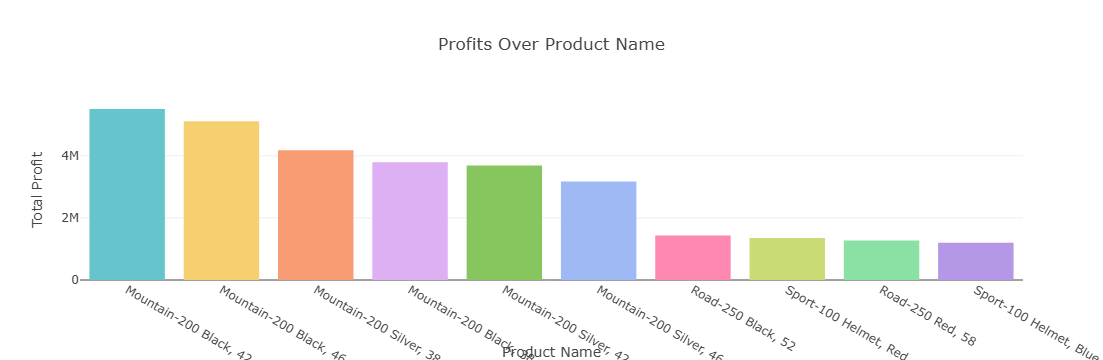

In [127]:
top_productname=df.groupby('ProductName')[['Profit']].sum().sort_values(ascending=False, by='Profit').head(10)

fig=go.Figure()
fig.add_trace(go.Bar(x=top_productname.index,
                   y=top_productname['Profit'],
                   marker=dict(color=colors2)
                    ))

fig.update_layout(
    title='Profits Over Product Name',
    xaxis_title='Product Name',
    yaxis_title='Total Profit',)
fig.show()

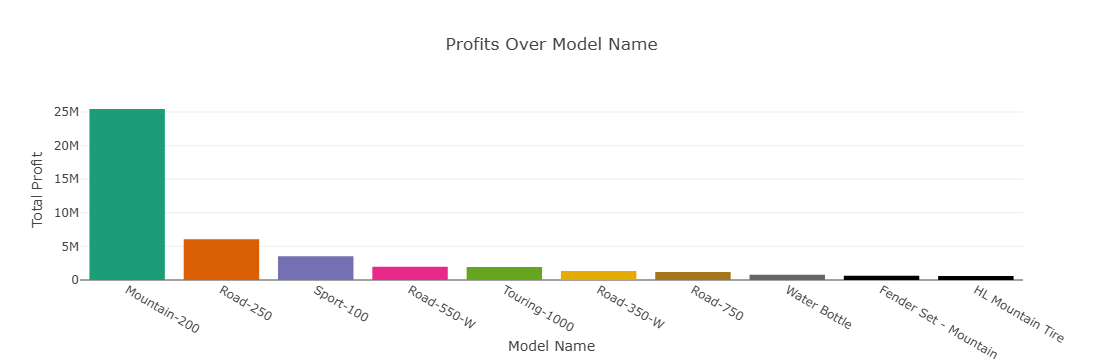

In [213]:
top_ModelName=df.groupby('ModelName')[['Profit']].sum().sort_values(ascending=False, by='Profit').head(10)

fig=go.Figure()
fig.add_trace(go.Bar(x=top_ModelName.index,
                   y=top_ModelName['Profit'],
                   marker=dict(color=colors3)
                    ))
fig.update_layout(
    title='Profits Over Model Name',
    xaxis_title='Model Name',
    yaxis_title='Total Profit',)
fig.show()

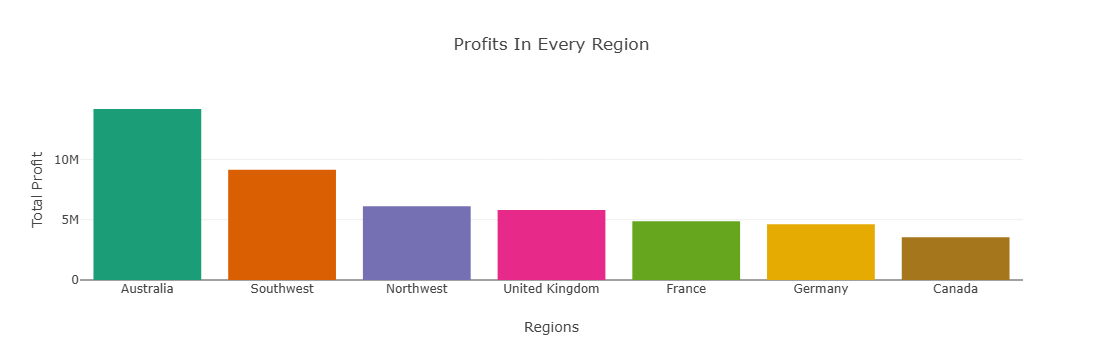

In [102]:
top_regions=df.groupby('Region')[['Profit']].sum().sort_values(ascending=False, by='Profit').head(7)

fig=go.Figure()
fig.add_trace(go.Bar(x=top_regions.index,
                   y=top_regions['Profit'],
                   marker=dict(color=colors3)
                    ))
fig.update_layout(
    title='Profits In Every Region',
    xaxis_title='Regions',
    yaxis_title='Total Profit',)
fig.show()

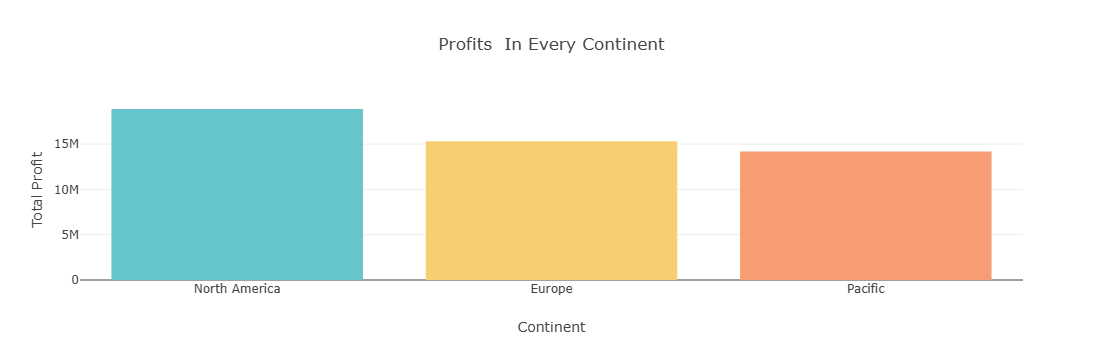

In [104]:
continent=df.groupby('Continent')[['Profit']].sum().sort_values(ascending=False, by='Profit')
fig=go.Figure()
fig.add_trace(go.Bar(x=continent.index,
                   y=continent['Profit'],
                   marker=dict(color=colors2)
                    ))
fig.update_layout(
    title='Profits  In Every Continent',
    xaxis_title='Continent',
    yaxis_title='Total Profit',)
fig.show()

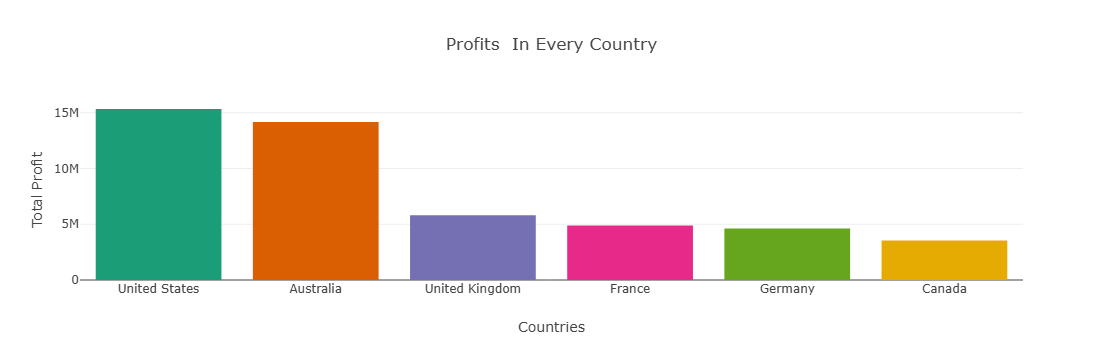

In [208]:
top_countries=df.groupby('Country')[['Profit']].sum().sort_values(ascending=False, by='Profit')
fig=go.Figure()
fig.add_trace(go.Bar(x=top_countries.index,
                   y=top_countries['Profit'],
                   marker=dict(color=colors3)
                    ))
fig.update_layout(
    title='Profits  In Every Country',
    xaxis_title='Countries',
    yaxis_title='Total Profit',)

fig.show()

# Multivariate Analysis

In [107]:
pivot_table = df.pivot_table(
    index=['ProductName', 'Order Season'],  # Rows: ProductName and OrderSeason
    values='Profit',  # Columns: Aggregate Profit
    aggfunc='sum',  # Aggregate by sum
)
pivot_table

Profit
ProductName                Order Season            
AWC Logo Cap               Autumn        59117.9850
                           Summer        28170.3150
                           Winter        27773.5500
All-Purpose Bike Stand     Autumn        54146.4960
                           Summer        19110.5280
...                                             ...
Women's Mountain Shorts, M Summer        12048.7675
                           Winter        18796.0773
Women's Mountain Shorts, S Autumn        39432.3300
                           Summer        14195.6388
                           Winter         8412.2304

[355 rows x 1 columns]

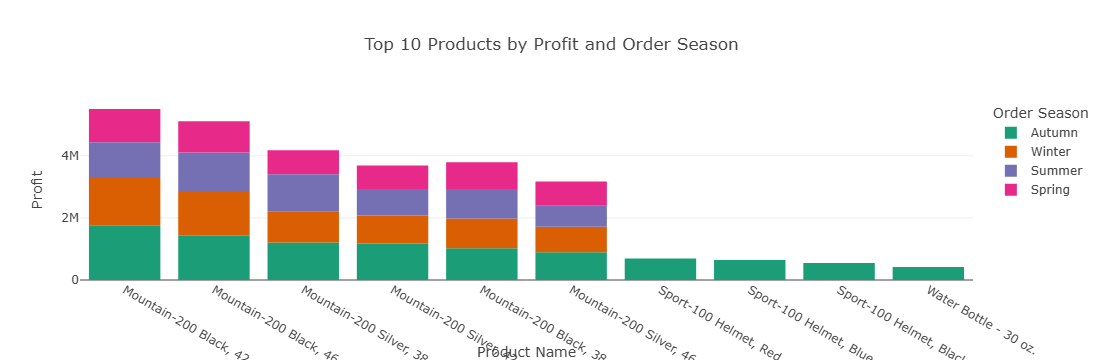

In [125]:
# Group by and reset index to get the top 10 products by Profit
x = df.groupby(['ProductName', 'Order Season'])[['Profit']].sum().sort_values(ascending=False, by='Profit').reset_index().head(28)

# Create the bar chart using Plotly Express
fig = px.bar(x, 
             x='ProductName', 
             y='Profit', 
             color='Order Season',  # Color by Order Season
             title="Top 10 Products by Profit and Order Season",
             color_discrete_sequence=px.colors.qualitative.Dark2  # Use Dark2 color palette
            )

# Show the plot
fig.show()

In [109]:
pivot_table = df.pivot_table(
    index=['ProductName', 'Return Season'],  # Rows: ProductName and OrderSeason
    values='Profit',  # Columns: Aggregate Profit
    aggfunc='sum',  # Aggregate by sum
)
pivot_table

Profit
ProductName                Return Season            
AWC Logo Cap               Autumn         25569.3000
                           Spring         33240.0900
                           Summer         23012.3700
                           Winter         33240.0900
All-Purpose Bike Stand     Autumn         11745.0120
...                                              ...
Women's Mountain Shorts, M Winter         34612.8230
Women's Mountain Shorts, S Autumn         15510.0498
                           Spring         15510.0498
                           Summer          5170.0166
                           Winter         25850.0830

[349 rows x 1 columns]

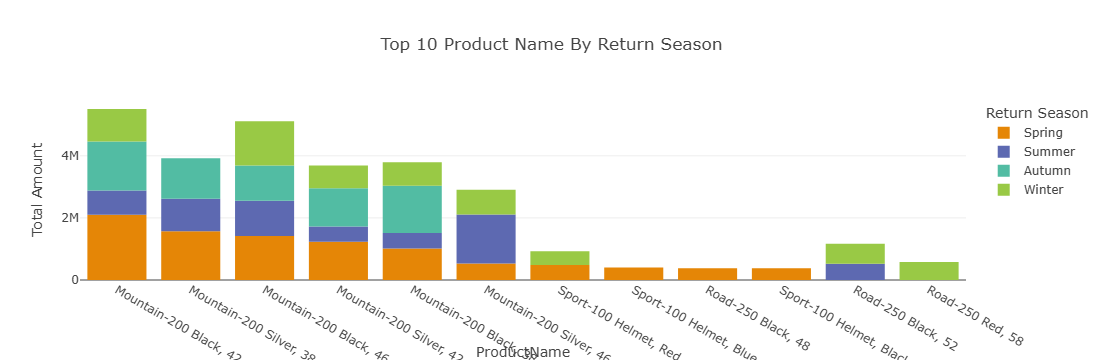

In [205]:
x = df.groupby(['ProductName', 'Return Season'])[['Profit']].sum().sort_values(ascending=False, by='Profit').reset_index().head(30)
# Create the bar chart using Plotly Express
fig = px.bar(x, 
             x='ProductName', 
             y='Profit', 
             color="Return Season",  # Color by Return Season
             title="Top 10 Product Name By Return Season",
             color_discrete_sequence=px.colors.qualitative.Vivid  # Use Vivid color palette
            )

fig.update_layout(
    yaxis_title="Total Amount",
)

# Show the plot
fig.show()

In [111]:
pivot_table = df.pivot_table(
        index=['ModelName', 'Return Season'],  
    values='Profit',  # Columns: Aggregate Profit
    aggfunc='sum',  # Aggregate by sum
)
pivot_table

Profit
ModelName               Return Season             
All-Purpose Bike Stand  Autumn          11745.0120
                        Spring          23490.0240
                        Summer          35235.0360
                        Winter          23490.0240
Bike Wash               Autumn           7484.9568
...                                            ...
Water Bottle            Winter         243698.5792
Women's Mountain Shorts Autumn          55993.9086
                        Spring          69576.1556
                        Summer          38731.3108
                        Winter          87101.6356

[150 rows x 1 columns]

In [112]:
x = df.groupby(['ModelName', 'Return Season'])[['Profit']].sum().sort_values(ascending=False, by='Profit').reset_index().head(31)

# Create the bar chart using Plotly Express
fig = px.bar(x, 
             x='ModelName', 
             y='Profit', 
             color='Return Season',  # Color by Return Season
             title="Top 10 Amount Of Model Name by Return Season",
             color_discrete_sequence=px.colors.qualitative.Vivid  # Use Vivid color palette
            )
fig.update_layout(
    yaxis_title="Total Amount",
)
# Show the plot
fig.show()

In [113]:
pivot_table = df.pivot_table(
        index=['Month Name', 'Continent'],  
    values='Profit',  # Columns: Aggregate Profit
    aggfunc='sum',  # Aggregate by sum
)
pivot_table

Profit
Month Name Continent                  
April      Europe         7.538596e+05
           North America  6.030612e+05
           Pacific        9.900306e+05
August     Europe         1.590059e+06
           North America  2.331209e+06
           Pacific        8.247505e+05
December   Europe         2.894588e+06
           North America  4.052479e+06
           Pacific        1.297414e+06
February   Europe         6.854164e+05
           North America  5.174438e+05
           Pacific        9.927279e+05
January    Europe         5.771862e+05
           North America  5.776412e+05
           Pacific        8.965315e+05
July       Europe         1.385370e+06
           North America  1.447847e+06
           Pacific        1.266556e+06
June       Europe         8.899670e+05
           North America  7.181756e+05
           Pacific        9.368961e+05
March      Europe         6.701471e+05
           North America  5.398020e+05
           Pacific        9.774077e+05
May        Europe         7.326895e+05
           North America  9.585114e+05
           Pacific        1.081651e+06
November   Europe         1.681161e+06
           North America  2.778825e+06
           Pacific        1.662355e+06
October    Europe         1.707644e+06
           North America  2.244652e+06
           Pacific        1.682705e+06
September  Europe         1.739451e+06
           North America  2.101908e+06
           Pacific        1.568182e+06

In [114]:
x = df.groupby(['Month Name', 'Continent'])[['Profit']].sum().sort_values(ascending=False, by='Profit').reset_index().head(31)
# Create the bar chart using Plotly Express
fig = px.bar(x, 
             x='Month Name', 
             y='Profit', 
             color='Continent',  # Color by Continent
             title="profit in months and continent",
             color_discrete_sequence=px.colors.qualitative.Bold  # Use Bold color palette
            )
# Show the plot
fig.show()

In [115]:
pivot_table = df.pivot_table(
        index=['Day', 'Continent'],  
    values='Profit',  # Columns: Aggregate Profit
    aggfunc='sum',  # Aggregate by sum
)
pivot_table

Profit
Day       Continent                  
Friday    Europe         2.221913e+06
          North America  2.552158e+06
          Pacific        1.917973e+06
Monday    Europe         2.154291e+06
          North America  2.818134e+06
          Pacific        2.106880e+06
Saturday  Europe         2.476984e+06
          North America  2.604800e+06
          Pacific        2.011042e+06
Sunday    Europe         2.180773e+06
          North America  2.710093e+06
          Pacific        2.004373e+06
Thursday  Europe         2.165083e+06
          North America  2.918731e+06
          Pacific        1.924091e+06
Tuesday   Europe         2.050841e+06
          North America  2.548782e+06
          Pacific        2.033665e+06
Wednesday Europe         2.057652e+06
          North America  2.718858e+06
          Pacific        2.179183e+06

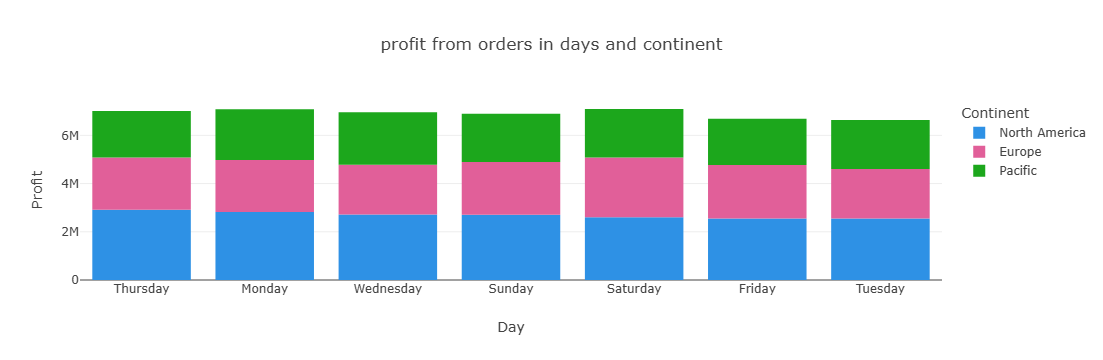

In [204]:
x = df.groupby(['Day', 'Continent'])[['Profit']].sum().sort_values(ascending=False, by='Profit').reset_index()

# Create the bar chart using Plotly Express
fig = px.bar(x, 
             x='Day', 
             y='Profit', 
             color='Continent',  # Color by Continent
             title="profit from orders in days and continent",
             color_discrete_sequence=px.colors.qualitative.Dark24  # Use Dark24 color palette
            )

# Show the plot
fig.show()

In [117]:
pivot_table = df.pivot_table(
        index=['Return_Month Name', 'Continent'],  
    values='Profit',  # Columns: Aggregate Profit
    aggfunc='sum',  # Aggregate by sum
)
pivot_table

Profit
Return_Month Name Continent                  
April             Europe         1.397668e+06
                  North America  1.635564e+06
                  Pacific        1.235444e+06
August            Europe         9.360824e+05
                  North America  1.019308e+06
                  Pacific        8.329211e+05
December          Europe         1.532534e+06
                  North America  1.811674e+06
                  Pacific        1.369594e+06
February          Europe         1.019286e+06
                  North America  1.240868e+06
                  Pacific        8.905274e+05
January           Europe         1.086415e+06
                  North America  1.406608e+06
                  Pacific        1.019794e+06
July              Europe         7.416902e+05
                  North America  7.138159e+05
                  Pacific        7.522665e+05
June              Europe         1.669029e+06
                  North America  2.243259e+06
                  Pacific        1.526638e+06
March             Europe         1.460234e+06
                  North America  1.859848e+06
                  Pacific        1.384088e+06
May               Europe         1.719074e+06
                  North America  2.201730e+06
                  Pacific        1.602317e+06
November          Europe         1.161809e+06
                  North America  1.463059e+06
                  Pacific        1.063768e+06
October           Europe         1.631169e+06
                  North America  1.989741e+06
                  Pacific        1.644752e+06
September         Europe         9.525470e+05
                  North America  1.286080e+06
                  Pacific        8.550966e+05

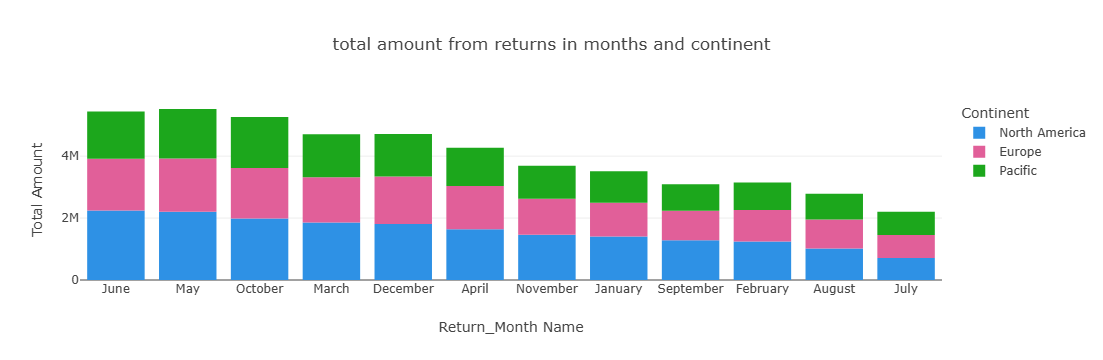

In [201]:
x = df.groupby(['Return_Month Name', 'Continent'])[['Profit']].sum().sort_values(ascending=False, by='Profit').reset_index()

# Create the bar chart using Plotly Express
fig = px.bar(x, 
             x='Return_Month Name', 
             y='Profit', 
             color='Continent',  # Color by Continent
             title="Top Months by Continent",
             color_discrete_sequence=px.colors.qualitative.Dark24  # Use Dark24 color palette
            )
fig.update_layout(
    title="total amount from returns in months and continent",
    yaxis_title="Total Amount",
)
# Show the plot
fig.show()

In [119]:
pivot_table = df.pivot_table(
        index=['Return_Day', 'Continent'],  
    values='Profit',  # Columns: Aggregate Profit
    aggfunc='sum',  # Aggregate by sum
)
pivot_table

Profit
Return_Day Continent                  
Friday     Europe         1.666136e+06
           North America  1.953239e+06
           Pacific        1.492279e+06
Monday     Europe         2.636057e+06
           North America  3.295181e+06
           Pacific        2.438637e+06
Saturday   Europe         2.512805e+06
           North America  2.721376e+06
           Pacific        2.383982e+06
Sunday     Europe         1.870302e+06
           North America  2.417920e+06
           Pacific        1.826832e+06
Thursday   Europe         2.210509e+06
           North America  2.861205e+06
           Pacific        2.030679e+06
Tuesday    Europe         2.182936e+06
           North America  2.799386e+06
           Pacific        1.943879e+06
Wednesday  Europe         2.228792e+06
           North America  2.823248e+06
           Pacific        2.060919e+06

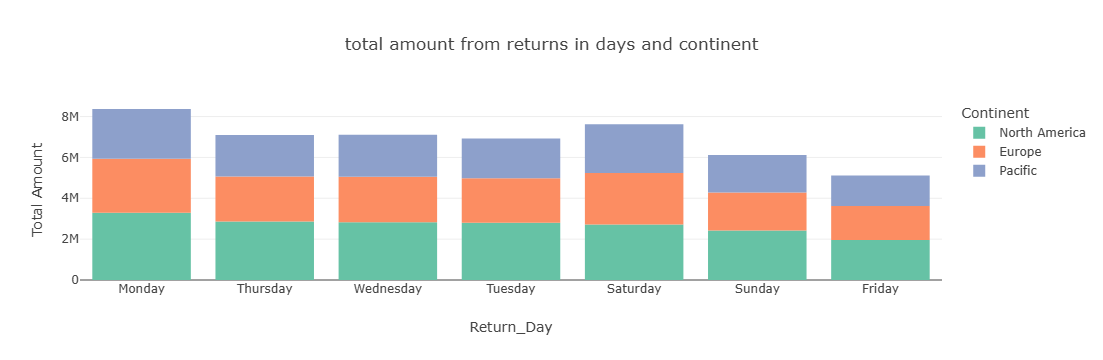

In [198]:
x = df.groupby(['Return_Day', 'Continent'])[['Profit']].sum().sort_values(ascending=False, by='Profit').reset_index()

# Create the bar chart using Plotly Express
fig = px.bar(x, 
             x='Return_Day', 
             y='Profit', 
             color='Continent',  # Color by Order Season
             title="total amount from returns in days and continent",
             color_discrete_sequence=px.colors.qualitative.Set2  # Use set2 color palette
            )
fig.update_layout(   
    yaxis_title="Total Amount",
)
# Show the plot
fig.show()

In [121]:
df.to_csv('new data.csv')

In [132]:
num=df.select_dtypes(include='number')

In [134]:
outlier_indices=detect_outliers(df, 0, num.columns)
len(outlier_indices)

297041

In [ ]:
df[df['Profit']==943.2882]['ProductName'].unique()

In [135]:
df['CategoryName'].unique()

array(['Bikes', 'Accessories', 'Clothing'], dtype=object)

In [140]:
df[df['CategoryName']=='Bikes']['ProductPrice']

0          1000.4375
1          1000.4375
2          1000.4375
3          1000.4375
4          1000.4375
             ...    
1135080    1700.9900
1135081    1700.9900
1135082    1700.9900
1135083    1700.9900
1135348     564.9900
Name: ProductPrice, Length: 52109, dtype: float64

In [147]:
df[df['SubcategoryName']=='Road Bikes']['ProductPrice'].max() # get information about maximum value

np.float64(2443.35)

In [153]:
df[df['ProductPrice']==2443.35]

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,OrderLineItem,OrderQuantity,ProductSKU,ProductName,ModelName,...,Week,Day,Return_Year,Return_Month,Return_Month Name,Return_Week,Return_Day,Order Season,Return Season,Profit
35,2016-01-01,2002-12-16,SO48798,369,23332,1,1,BK-R89R-48,"Road-250 Red, 48",Road-250,...,53,Friday,2015,9,September,36,Thursday,Winter,Autumn,924.5636
36,2016-01-01,2002-12-16,SO48798,369,23332,1,1,BK-R89R-48,"Road-250 Red, 48",Road-250,...,53,Friday,2016,2,February,8,Monday,Winter,Winter,924.5636
37,2016-01-01,2002-12-16,SO48798,369,23332,1,1,BK-R89R-48,"Road-250 Red, 48",Road-250,...,53,Friday,2016,5,May,22,Tuesday,Winter,Spring,924.5636
38,2016-01-01,2002-12-16,SO48798,369,23332,1,1,BK-R89R-48,"Road-250 Red, 48",Road-250,...,53,Friday,2016,6,June,25,Saturday,Winter,Summer,924.5636
106,2016-01-02,2002-11-23,SO48809,369,23411,1,1,BK-R89R-48,"Road-250 Red, 48",Road-250,...,53,Saturday,2015,9,September,36,Thursday,Winter,Autumn,924.5636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16417,2016-06-28,2003-04-21,SO51061,370,24604,1,1,BK-R89R-52,"Road-250 Red, 52",Road-250,...,26,Tuesday,2016,3,March,11,Friday,Summer,Spring,924.5636
16418,2016-06-28,2003-04-21,SO51061,370,24604,1,1,BK-R89R-52,"Road-250 Red, 52",Road-250,...,26,Tuesday,2016,5,May,18,Tuesday,Summer,Spring,924.5636
16442,2016-06-28,2003-03-09,SO51052,368,17998,1,1,BK-R89R-44,"Road-250 Red, 44",Road-250,...,26,Tuesday,2015,10,October,44,Tuesday,Summer,Autumn,924.5636
16443,2016-06-28,2003-03-09,SO51052,368,17998,1,1,BK-R89R-44,"Road-250 Red, 44",Road-250,...,26,Tuesday,2016,3,March,13,Thursday,Summer,Spring,924.5636


# Conclusions

1-total profit from sales is: 48356299.371

2-the highest continent make profits of 18871555.50 is: North America & the lowest continent make profits of 14177206.47 is: Pacific

3-the highest country make profits of 15335141.02 is: United States & the lowest country make profits of 3536414.48 is: canada

4-the highest region make profits of 14177206.47 is: Australia & the lowest region make profits of 13773.32 is: Southeast

5-the highest category make profits of 38920762.80 are: bikes & the lowest category make profits of 786581.69 are: clothing

6-the highest subcategory make profits of 25777836.61 are: mountain bikes & the lowest subcategory make profits of 14536.35 are: Socks

7-the highest month make profits of 8244480.91 is: December & the lowest month make profits of 2051358.92 is: January

8-the highest day make profits of 7092825.72 is: Saturday & the lowest month make profits of 6633287.91 is: Tuesday

9-the highest month make returns of 5523120.28 is: May & the lowest month make returns of 2207772.61 is: July

10-the highest day make returns of 8369875.51 is: Monday & the lowest month make returns of 5111653.42 is: Friday

11-the higest season make profits of 17166881.94 is: Autumn & the lowest season make profits of 7307160.36 is: Spring

12-the higest season make returns of 14495966.12 is: Spring & the lowest season make returns of 10435010.25 is: Summer


In [193]:
df.columns

Index(['OrderDate', 'StockDate', 'OrderNumber', 'ProductKey', 'CustomerKey',
       'OrderLineItem', 'OrderQuantity', 'ProductSKU', 'ProductName',
       'ModelName', 'ProductDescription', 'ProductSize', 'ProductStyle',
       'ProductCost', 'ProductPrice', 'ReturnDate', 'ReturnQuantity', 'Region',
       'Country', 'Continent', 'SubcategoryName', 'CategoryName', 'Year',
       'Month', 'Month Name', 'Week', 'Day', 'Return_Year', 'Return_Month',
       'Return_Month Name', 'Return_Week', 'Return_Day', 'Order Season',
       'Return Season', 'Profit'],
      dtype='object')